In [2]:
import pandas as pd
import numpy as np

# Load with alternate encoding
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Show first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Check for any missing/null values
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Check duplicates
df.duplicated().sum()

# Remove them
df = df.drop_duplicates()


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


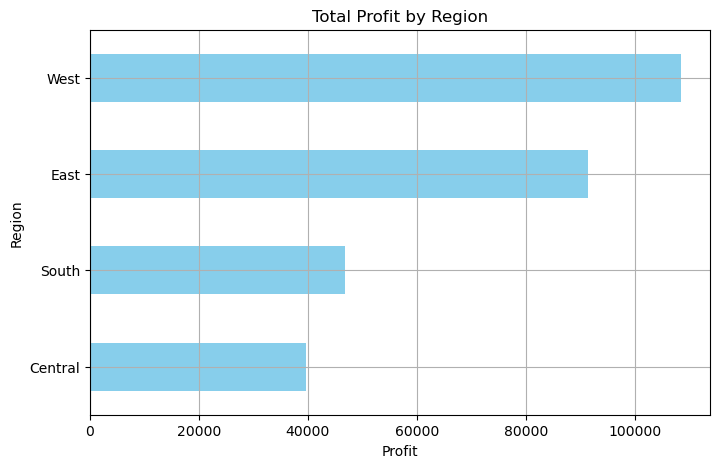

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total profit by region
plt.figure(figsize=(8,5))
df.groupby('Region')['Profit'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Profit by Region')
plt.xlabel('Profit')
plt.ylabel('Region')
plt.grid(True)
plt.show()


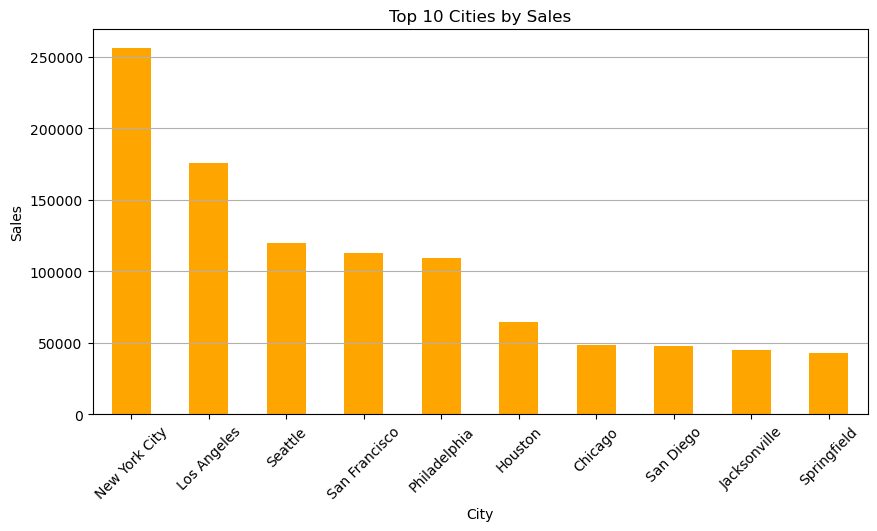

In [8]:
# Top 10 cities by total sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


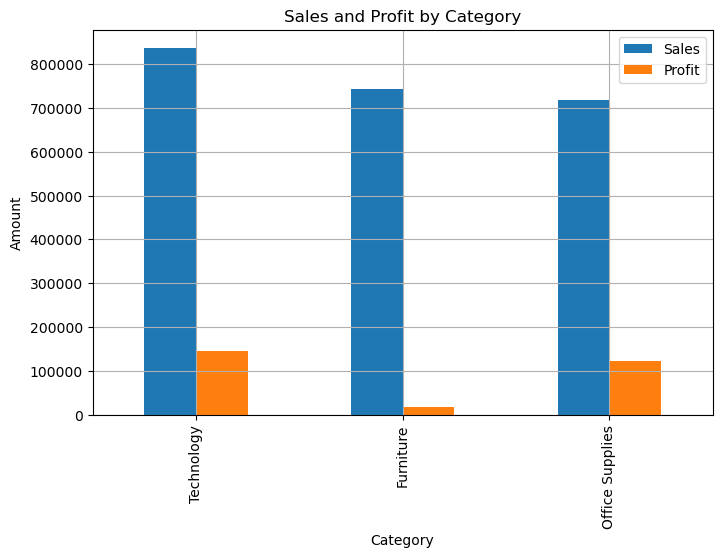

In [9]:
# Category-wise sales and profit
category_group = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

category_group.plot(kind='bar', figsize=(8,5))
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


In [10]:
import numpy as np

# Convert the 'Sales' column to a NumPy array
sales_array = np.array(df['Sales'])

# Show first 5 values
print("Sample sales data:", sales_array[:5])

# Basic statistics using NumPy
print("Total Sales:", np.sum(sales_array))
print("Average Sale:", np.mean(sales_array))
print("Highest Sale:", np.max(sales_array))
print("Lowest Sale:", np.min(sales_array))
print("Standard Deviation of Sales:", np.std(sales_array))


Sample sales data: [261.96   731.94    14.62   957.5775  22.368 ]
Total Sales: 2297200.8603000003
Average Sale: 229.85800083049833
Highest Sale: 22638.48
Lowest Sale: 0.444
Standard Deviation of Sales: 623.2139187650461


In [11]:
# Create new columns for Month and Year
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')


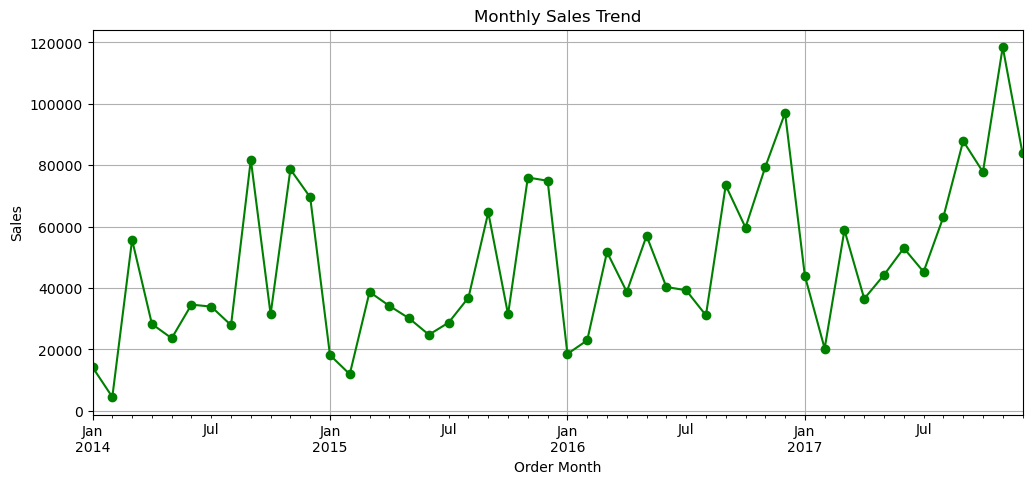

In [12]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()

monthly_sales.plot(figsize=(12, 5), marker='o', color='green', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [13]:
# Create new columns for Month and Year
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')


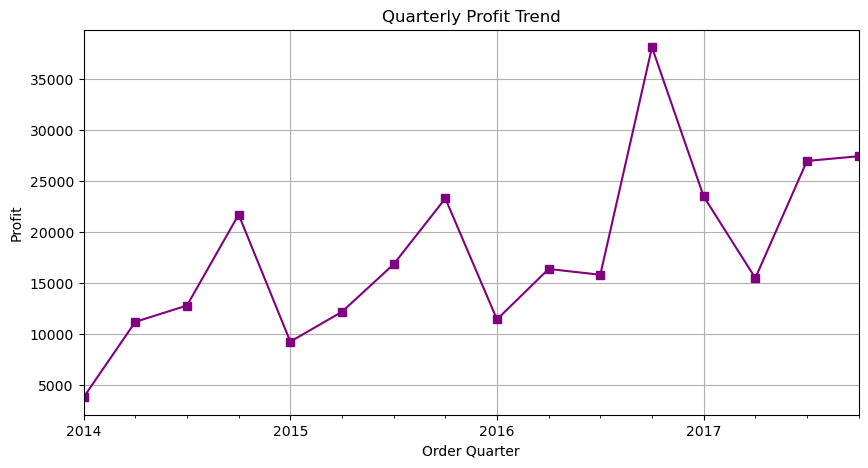

In [14]:
quarterly_profit = df.groupby('Order Quarter')['Profit'].sum()

quarterly_profit.plot(figsize=(10, 5), marker='s', color='purple', title='Quarterly Profit Trend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


In [15]:
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Classify customers by purchase level
customer_segment = pd.qcut(customer_sales, q=4, labels=['Low', 'Medium', 'High', 'Top'])

# Combine into one DataFrame
customer_df = pd.DataFrame({'Total Sales': customer_sales, 'Segment': customer_segment})

customer_df.head(10)


,Total Sales,Segment
Customer Name,,
Sean Miller,25043.050,Top
Tamara Chand,19052.218,Top
Raymond Buch,15117.339,Top
Tom Ashbrook,14595.620,Top
Adrian Barton,14473.571,Top
Ken Lonsdale,14175.229,Top
Sanjit Chand,14142.334,Top
Hunter Lopez,12873.298,Top
Sanjit Engle,12209.438,Top
